# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [100]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [101]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  object 
 2   MODEL            22556 non-null  object 
 3   VEHICLE CLASS    22556 non-null  object 
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  object 
 7   FUEL             22556 non-null  object 
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [102]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

,count
VEHICLE CLASS,
COMPACT,3127
MID-SIZE,2960
SUV,2640
PICKUP TRUCK - STANDARD,2204
SUBCOMPACT,2010
SUV - SMALL,1756
FULL-SIZE,1503
TWO-SEATER,1312
SUV - STANDARD,1122


In [99]:
#코랩 환경 폰트 설정

import subprocess
subprocess.run(['apt-get', 'install', '-y', 'fonts-nanum'], capture_output=True)

import matplotlib
import matplotlib.font_manager as fm

# 캐시 삭제
import os
cache_path = os.path.join(matplotlib.get_cachedir(), 'fontlist-v330.json')
if os.path.exists(cache_path):
    os.remove(cache_path)

# 나눔고딕 경로 직접 등록
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [103]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
emissions = df['EMISSIONS']

mean_val = emissions.mean()
median_val = emissions.median()
mode_val = emissions.mode().values

print("=== EMISSIONS 기본 대표값 ===")
print(f"산술평균: {mean_val:.2f}")
print(f"중앙값: {median_val:.2f}")
print(f"최빈값: {mode_val}")

# TODO 2: 절사평균 계산
trim_10 = stats.trim_mean(emissions, 0.1)
trim_20 = stats.trim_mean(emissions, 0.2)

print(f"\n=== 절사평균 ===")
print(f"10% 절사평균: {trim_10:.2f}")
print(f"20% 절사평균: {trim_20:.2f}")
print(f"산술평균과의 차이 (10%): {abs(mean_val - trim_10):.2f}")
print(f"산술평균과의 차이 (20%): {abs(mean_val - trim_20):.2f}")

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산
print(f"\n=== 차량등급 확인 ===")
suv_classes = [c for c in df['VEHICLE CLASS'].unique() if 'SUV' in c]
print(f"SUV 관련 클래스: {suv_classes}")

compact_mean = df[df['VEHICLE CLASS'] == 'COMPACT']['EMISSIONS'].mean()
midsize_mean = df[df['VEHICLE CLASS'] == 'MID-SIZE']['EMISSIONS'].mean()
suv_mean = df[df['VEHICLE CLASS'].str.contains('SUV', na=False)]['EMISSIONS'].mean()

class_means = np.array([compact_mean, midsize_mean, suv_mean])
weights = np.array([50, 30, 20])

weighted_avg = np.average(class_means, weights=weights)

print(f"\n=== 가중평균 ===")
print(f"COMPACT 평균 배출량: {compact_mean:.2f}")
print(f"MID-SIZE 평균 배출량: {midsize_mean:.2f}")
print(f"SUV 평균 배출량: {suv_mean:.2f}")
print(f"가중평균 (50:30:20): {weighted_avg:.2f}")

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
print(f"\n=== 차량등급별 평균/중앙값 비교 ===")

df_filtered = df[
    (df['VEHICLE CLASS'] == 'COMPACT') |
    (df['VEHICLE CLASS'] == 'MID-SIZE') |
    (df['VEHICLE CLASS'].str.contains('SUV', na=False))
].copy()
df_filtered.loc[df_filtered['VEHICLE CLASS'].str.contains('SUV', na=False), 'VEHICLE CLASS'] = 'SUV'

class_comparison = df_filtered.groupby('VEHICLE CLASS')['EMISSIONS'].agg([
    ('평균', 'mean'),
    ('중앙값', 'median'),
])
class_comparison['평균-중앙값 차이'] = class_comparison['평균'] - class_comparison['중앙값']
display(class_comparison.round(2))

# TODO 5: 결과 해석
print(f"\n=== 결과 해석 ===")
print(f"1. 산술평균({mean_val:.2f})과 중앙값({median_val:.2f})의 차이:")
if mean_val > median_val:
    print(f"   → 평균 > 중앙값: 오른쪽으로 꼬리가 긴 분포 (양의 왜도)")
    print(f"   → 고배출 차량(이상치)이 평균을 끌어올리므로, 중앙값이 더 대표적")
elif mean_val < median_val:
    print(f"   → 평균 < 중앙값: 왼쪽으로 꼬리가 긴 분포 (음의 왜도)")
else:
    print(f"   → 평균 ≈ 중앙값: 대칭에 가까운 분포")
print(f"2. 절사평균은 이상치의 영향을 줄이면서 평균의 장점을 유지")
print(f"   → 이상치가 있을 때 산술평균과 절사평균의 차이가 크면 이상치 영향이 큰 것")
print(f"3. SUV는 COMPACT보다 배출량이 높아 가중치에 따라 가중평균이 달라짐")
print(f"4. 이상치가 의심될 때: 중앙값 또는 절사평균이 적절")
print(f"   대칭 분포일 때: 산술평균이 적절")
print(f"   중요도가 다를 때: 가중평균이 적절")

=== EMISSIONS 기본 대표값 ===
산술평균: 250.07
중앙값: 243.00
최빈값: [221]

=== 절사평균 ===
10% 절사평균: 247.34
20% 절사평균: 245.40
산술평균과의 차이 (10%): 2.72
산술평균과의 차이 (20%): 4.67

=== 차량등급 확인 ===
SUV 관련 클래스: ['SUV', 'SUV - STANDARD', 'SUV - SMALL']

=== 가중평균 ===
COMPACT 평균 배출량: 211.54
MID-SIZE 평균 배출량: 223.70
SUV 평균 배출량: 263.44
가중평균 (50:30:20): 225.57

=== 차량등급별 평균/중앙값 비교 ===


,평균,중앙값,평균-중앙값 차이
VEHICLE CLASS,,,
COMPACT,211.54,207.0,4.54
MID-SIZE,223.70,221.0,2.70
SUV,263.44,258.0,5.44



=== 결과 해석 ===
1. 산술평균(250.07)과 중앙값(243.00)의 차이:
   → 평균 > 중앙값: 오른쪽으로 꼬리가 긴 분포 (양의 왜도)
   → 고배출 차량(이상치)이 평균을 끌어올리므로, 중앙값이 더 대표적
2. 절사평균은 이상치의 영향을 줄이면서 평균의 장점을 유지
   → 이상치가 있을 때 산술평균과 절사평균의 차이가 크면 이상치 영향이 큰 것
3. SUV는 COMPACT보다 배출량이 높아 가중치에 따라 가중평균이 달라짐
4. 이상치가 의심될 때: 중앙값 또는 절사평균이 적절
   대칭 분포일 때: 산술평균이 적절
   중요도가 다를 때: 가중평균이 적절


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

=== 산포 측도 계산 ===


,변수,평균,분산(표본),표준편차(표본),범위,Q1,Q3,IQR
0,COMB (L/100 km),11.0343,8.4735,2.9109,22.5,9.1,12.7,3.6
1,ENGINE SIZE,3.3566,1.7834,1.3354,7.6,2.3,4.2,1.9



=== 변동계수(CV) ===
COMB (L/100 km) CV: 26.38%
ENGINE SIZE CV: 39.78%
→ ENGINE SIZE가 상대적으로 더 퍼져 있음

=== 이상치 탐지 ===

[COMB (L/100 km)]
  IQR 방법: 하한=3.70, 상한=18.10
  IQR 이상치 개수: 548
  Z-score |Z|>2 이상치 개수: 1124
  Z-score |Z|>3 이상치 개수: 219

[ENGINE SIZE]
  IQR 방법: 하한=-0.55, 상한=7.05
  IQR 이상치 개수: 41
  Z-score |Z|>2 이상치 개수: 762
  Z-score |Z|>3 이상치 개수: 41


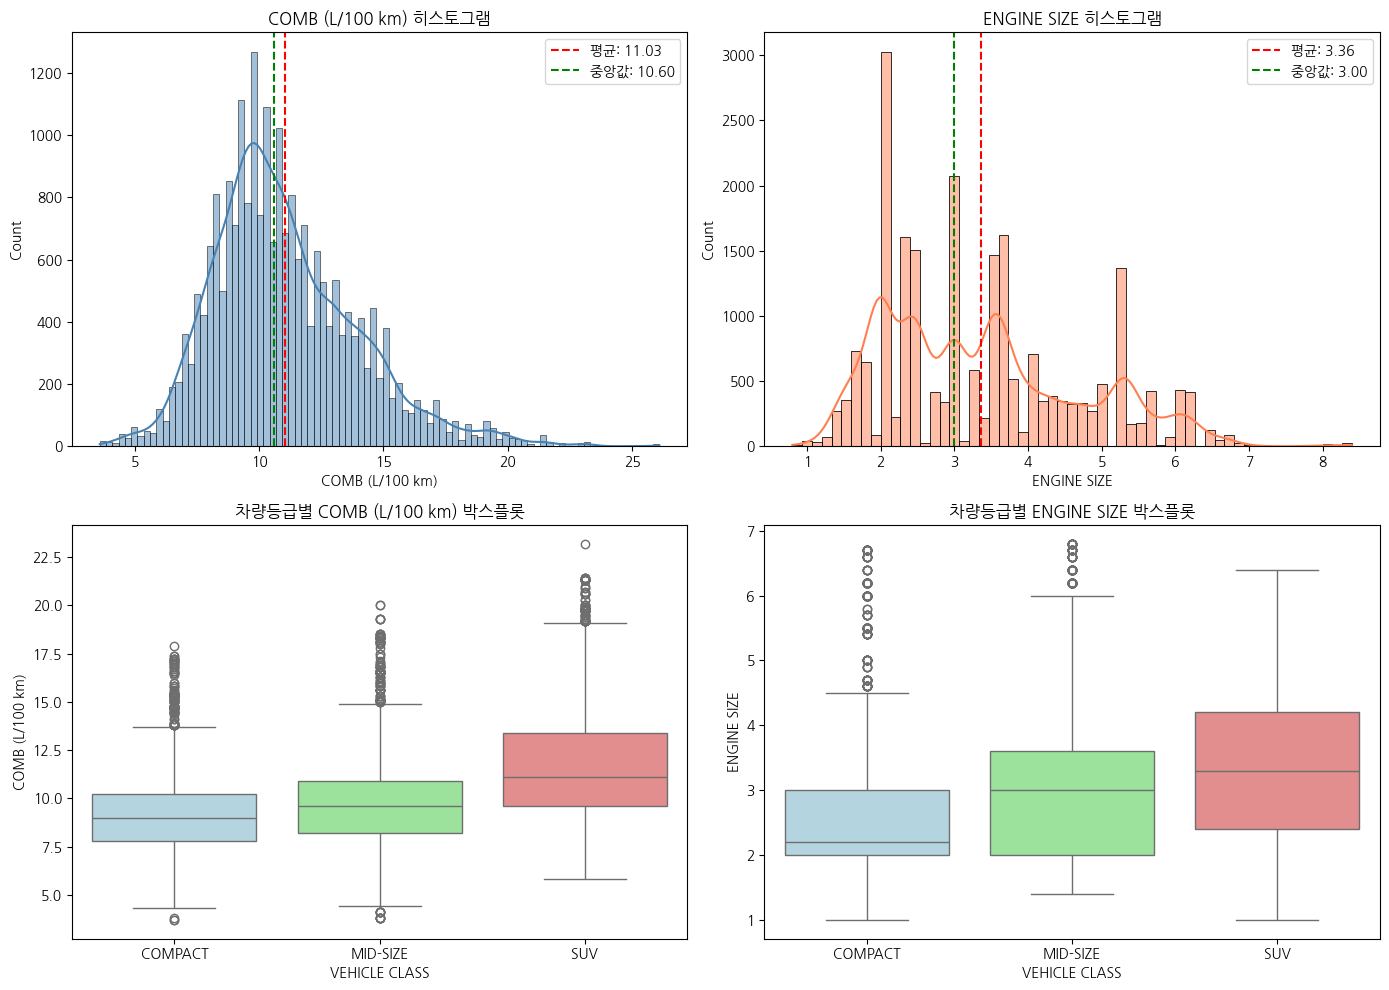


=== 차량등급별 표준편차 비교 ===


COMB (L/100 km)          ENGINE SIZE        
                         표준편차       평균        표준편차      평균
VEHICLE CLASS                                             
COMPACT                2.0604   9.1749      1.0786  2.5638
MID-SIZE               2.3951   9.7468      1.1950  3.0769
SUV                    2.6622  11.6430      1.2556  3.4302


=== 결과 해석 ===
1. 변동계수(CV) 비교: COMB=26.38%, ENGINE SIZE=39.78%
   → CV가 높은 변수가 평균 대비 상대적으로 더 넓게 퍼져 있음
2. IQR 방법은 중앙값 기반이라 비대칭 분포에서 강건하게 이상치를 탐지
   Z-score 방법은 정규분포를 가정하므로, 분포가 치우쳐 있으면 결과가 다를 수 있음
3. SUV는 COMPACT에 비해 연비(COMB)와 엔진 크기(ENGINE SIZE) 모두 높고 산포도 큼
   → 차량 등급에 따라 데이터의 산포 특성이 다르므로 그룹별 분석이 중요


In [104]:
# TODO 1: 두 변수의 산포 측도 계산
comb = df['COMB (L/100 km)']
engine = df['ENGINE SIZE']

print("=== 산포 측도 계산 ===")
dispersion_df = pd.DataFrame({
    '변수': ['COMB (L/100 km)', 'ENGINE SIZE'],
    '평균': [comb.mean(), engine.mean()],
    '분산(표본)': [comb.var(ddof=1), engine.var(ddof=1)],
    '표준편차(표본)': [comb.std(ddof=1), engine.std(ddof=1)],
    '범위': [comb.max() - comb.min(), engine.max() - engine.min()],
    'Q1': [comb.quantile(0.25), engine.quantile(0.25)],
    'Q3': [comb.quantile(0.75), engine.quantile(0.75)],
    'IQR': [comb.quantile(0.75) - comb.quantile(0.25),
            engine.quantile(0.75) - engine.quantile(0.25)],
})
display(dispersion_df.round(4))

# TODO 2: 변동계수(CV) 계산
cv_comb = (comb.std() / comb.mean()) * 100
cv_engine = (engine.std() / engine.mean()) * 100

print(f"\n=== 변동계수(CV) ===")
print(f"COMB (L/100 km) CV: {cv_comb:.2f}%")
print(f"ENGINE SIZE CV: {cv_engine:.2f}%")
if cv_comb > cv_engine:
    print(f"→ COMB이 상대적으로 더 퍼져 있음")
else:
    print(f"→ ENGINE SIZE가 상대적으로 더 퍼져 있음")

# TODO 3: 이상치 탐지 (IQR, Z-score)
print(f"\n=== 이상치 탐지 ===")

for col_name, col_data in [('COMB (L/100 km)', comb), ('ENGINE SIZE', engine)]:
    print(f"\n[{col_name}]")

    # IQR 방법
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    iqr_lower = Q1 - 1.5 * IQR
    iqr_upper = Q3 + 1.5 * IQR
    iqr_outliers = col_data[(col_data < iqr_lower) | (col_data > iqr_upper)]
    print(f"  IQR 방법: 하한={iqr_lower:.2f}, 상한={iqr_upper:.2f}")
    print(f"  IQR 이상치 개수: {len(iqr_outliers)}")

    # Z-score 방법
    z_scores = (col_data - col_data.mean()) / col_data.std()
    z_outliers_2 = col_data[np.abs(z_scores) > 2]
    z_outliers_3 = col_data[np.abs(z_scores) > 3]
    print(f"  Z-score |Z|>2 이상치 개수: {len(z_outliers_2)}")
    print(f"  Z-score |Z|>3 이상치 개수: {len(z_outliers_3)}")

# TODO 4: 2×2 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# COMB 히스토그램
sns.histplot(comb, kde=True, color='steelblue', ax=axes[0, 0])
axes[0, 0].axvline(comb.mean(), color='red', linestyle='--', label=f'평균: {comb.mean():.2f}')
axes[0, 0].axvline(comb.median(), color='green', linestyle='--', label=f'중앙값: {comb.median():.2f}')
axes[0, 0].set_title('COMB (L/100 km) 히스토그램', fontweight='bold')
axes[0, 0].legend()

# ENGINE SIZE 히스토그램
sns.histplot(engine, kde=True, color='coral', ax=axes[0, 1])
axes[0, 1].axvline(engine.mean(), color='red', linestyle='--', label=f'평균: {engine.mean():.2f}')
axes[0, 1].axvline(engine.median(), color='green', linestyle='--', label=f'중앙값: {engine.median():.2f}')
axes[0, 1].set_title('ENGINE SIZE 히스토그램', fontweight='bold')
axes[0, 1].legend()

# 차량등급별 필터링
df_3class = df[
    (df['VEHICLE CLASS'] == 'COMPACT') |
    (df['VEHICLE CLASS'] == 'MID-SIZE') |
    (df['VEHICLE CLASS'].str.contains('SUV', na=False))
].copy()
df_3class.loc[df_3class['VEHICLE CLASS'].str.contains('SUV', na=False), 'VEHICLE CLASS'] = 'SUV'

# 차량등급별 COMB 박스플롯
sns.boxplot(data=df_3class, x='VEHICLE CLASS', y='COMB (L/100 km)',
            palette=['lightblue', 'lightgreen', 'lightcoral'], ax=axes[1, 0])
axes[1, 0].set_title('차량등급별 COMB (L/100 km) 박스플롯', fontweight='bold')

# 차량등급별 ENGINE SIZE 박스플롯
sns.boxplot(data=df_3class, x='VEHICLE CLASS', y='ENGINE SIZE',
            palette=['lightblue', 'lightgreen', 'lightcoral'], ax=axes[1, 1])
axes[1, 1].set_title('차량등급별 ENGINE SIZE 박스플롯', fontweight='bold')

plt.tight_layout()
plt.show()

# TODO 5: 차량등급별 표준편차 비교
print(f"\n=== 차량등급별 표준편차 비교 ===")
class_std = df_3class.groupby('VEHICLE CLASS')[['COMB (L/100 km)', 'ENGINE SIZE']].agg([
    ('표준편차', 'std'),
    ('평균', 'mean'),
])
display(class_std.round(4))

# TODO 6: 결과 해석
print(f"\n=== 결과 해석 ===")
print(f"1. 변동계수(CV) 비교: COMB={cv_comb:.2f}%, ENGINE SIZE={cv_engine:.2f}%")
print(f"   → CV가 높은 변수가 평균 대비 상대적으로 더 넓게 퍼져 있음")
print(f"2. IQR 방법은 중앙값 기반이라 비대칭 분포에서 강건하게 이상치를 탐지")
print(f"   Z-score 방법은 정규분포를 가정하므로, 분포가 치우쳐 있으면 결과가 다를 수 있음")
print(f"3. SUV는 COMPACT에 비해 연비(COMB)와 엔진 크기(ENGINE SIZE) 모두 높고 산포도 큼")
print(f"   → 차량 등급에 따라 데이터의 산포 특성이 다르므로 그룹별 분석이 중요")

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

=== 왜도/첨도 계산 ===


,변수,평균,중앙값,왜도,첨도,왜도 해석,첨도 해석
0,ENGINE SIZE,3.3566,3.0,0.6313,-0.3949,오른쪽 꼬리 (양의 왜도),정규분포와 유사
1,COMB (L/100 km),11.0343,10.6,0.8171,1.0546,오른쪽 꼬리 (양의 왜도),꼬리 두꺼움 (극단값 많음)
2,COMB (mpg),27.3745,27.0,1.1728,3.6436,오른쪽 꼬리 (양의 왜도),꼬리 두꺼움 (극단값 많음)
3,EMISSIONS,250.0685,243.0,0.5346,0.6154,오른쪽 꼬리 (양의 왜도),꼬리 두꺼움 (극단값 많음)


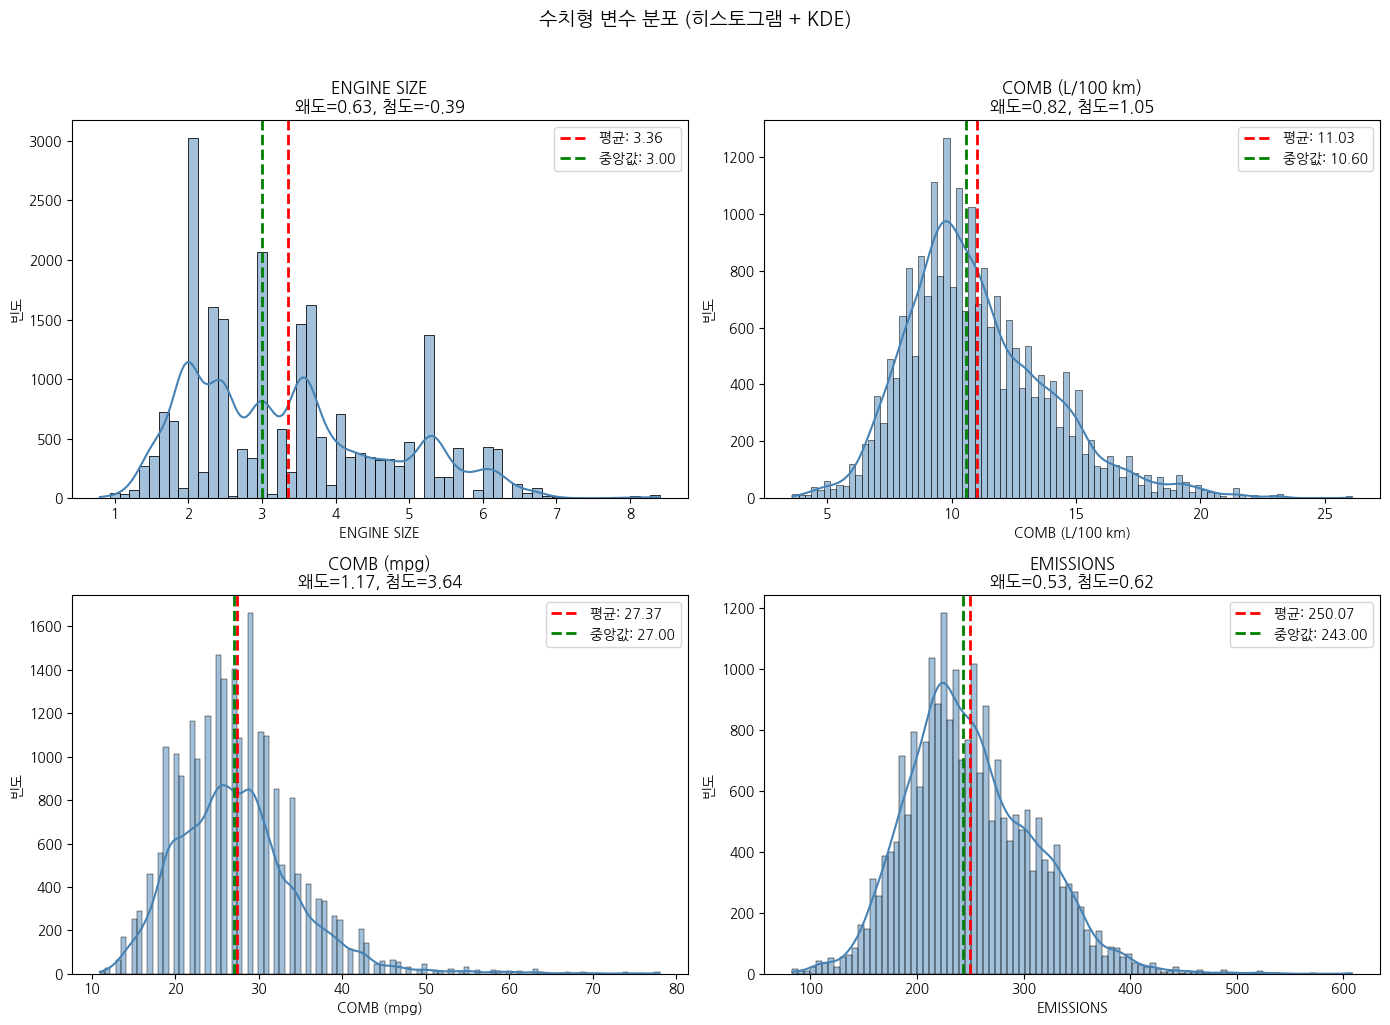


=== 연료타입(FUEL)별 EMISSIONS 왜도/첨도 ===


,개수,평균,중앙값,왜도,첨도
FUEL,,,,,
D,314,230.3057,246.0,-0.3677,-1.0428
E,1071,270.5789,275.0,-0.1893,-0.2563
N,33,312.8485,319.0,-1.8518,3.0713
X,11822,240.2807,232.0,0.3305,-0.2929
Z,9316,260.5748,248.0,0.9972,1.6075



=== 결과 해석 ===

[ENGINE SIZE]
  왜도=0.63 → 오른쪽 꼬리 (양의 왜도)
  첨도=-0.39 → 정규분포와 유사
  평균(3.36) > 중앙값(3.00): 양의 왜도와 일치

[COMB (L/100 km)]
  왜도=0.82 → 오른쪽 꼬리 (양의 왜도)
  첨도=1.05 → 꼬리 두꺼움 (극단값 많음)
  평균(11.03) > 중앙값(10.60): 양의 왜도와 일치

[COMB (mpg)]
  왜도=1.17 → 오른쪽 꼬리 (양의 왜도)
  첨도=3.64 → 꼬리 두꺼움 (극단값 많음)
  평균(27.37) > 중앙값(27.00): 양의 왜도와 일치

[EMISSIONS]
  왜도=0.53 → 오른쪽 꼬리 (양의 왜도)
  첨도=0.62 → 꼬리 두꺼움 (극단값 많음)
  평균(250.07) > 중앙값(243.00): 양의 왜도와 일치

[연료타입별 해석]
  연료타입에 따라 EMISSIONS의 분포 형태가 다를 수 있음
  왜도가 크게 다른 연료타입은 분포가 비대칭적이므로 중앙값이 더 적절한 대표값


In [105]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
print("=== 왜도/첨도 계산 ===")

skew_vals = df[numeric_cols].skew()
kurt_vals = df[numeric_cols].kurt()

# TODO 2: 결과 DataFrame 정리
def interpret_skew(s):
    if abs(s) < 0.5:
        return "대칭에 가까움"
    elif s > 0:
        return "오른쪽 꼬리 (양의 왜도)"
    else:
        return "왼쪽 꼬리 (음의 왜도)"

def interpret_kurt(k):
    if abs(k) < 0.5:
        return "정규분포와 유사"
    elif k > 0:
        return "꼬리 두꺼움 (극단값 많음)"
    else:
        return "꼬리 얇음 (극단값 적음)"

result_df = pd.DataFrame({
    '변수': numeric_cols,
    '평균': [df[c].mean() for c in numeric_cols],
    '중앙값': [df[c].median() for c in numeric_cols],
    '왜도': [skew_vals[c] for c in numeric_cols],
    '첨도': [kurt_vals[c] for c in numeric_cols],
    '왜도 해석': [interpret_skew(skew_vals[c]) for c in numeric_cols],
    '첨도 해석': [interpret_kurt(kurt_vals[c]) for c in numeric_cols],
})
display(result_df.round(4))

# TODO 3: 2×2 히스토그램+KDE 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, col in enumerate(numeric_cols):
    ax = axes[idx // 2, idx % 2]
    data = df[col]

    sns.histplot(data, kde=True, color='steelblue', ax=ax)
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {data.mean():.2f}')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'중앙값: {data.median():.2f}')
    ax.set_title(f'{col}\n왜도={data.skew():.2f}, 첨도={data.kurt():.2f}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('빈도')
    ax.legend()

plt.suptitle('수치형 변수 분포 (히스토그램 + KDE)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
print(f"\n=== 연료타입(FUEL)별 EMISSIONS 왜도/첨도 ===")
fuel_stats = df.groupby('FUEL')['EMISSIONS'].agg([
    ('개수', 'count'),
    ('평균', 'mean'),
    ('중앙값', 'median'),
    ('왜도', 'skew'),
    ('첨도', lambda x: x.kurt()),
])
display(fuel_stats.round(4))

# TODO 5: 결과 해석
print(f"\n=== 결과 해석 ===")
for col in numeric_cols:
    s = skew_vals[col]
    k = kurt_vals[col]
    m = df[col].mean()
    md = df[col].median()
    print(f"\n[{col}]")
    print(f"  왜도={s:.2f} → {interpret_skew(s)}")
    print(f"  첨도={k:.2f} → {interpret_kurt(k)}")
    if m > md:
        print(f"  평균({m:.2f}) > 중앙값({md:.2f}): 양의 왜도와 일치")
    elif m < md:
        print(f"  평균({m:.2f}) < 중앙값({md:.2f}): 음의 왜도와 일치")
    else:
        print(f"  평균 ≈ 중앙값: 대칭 분포")

print(f"\n[연료타입별 해석]")
print(f"  연료타입에 따라 EMISSIONS의 분포 형태가 다를 수 있음")
print(f"  왜도가 크게 다른 연료타입은 분포가 비대칭적이므로 중앙값이 더 적절한 대표값")

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [106]:
import math


def my_mean(data):
    """산술평균: 합계 / 개수"""
    return sum(data) / len(data)


def my_trimmed_mean(data, proportion):
    """절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균"""
    sorted_data = sorted(data)
    n = len(sorted_data)
    trim_count = int(n * proportion)
    trimmed = sorted_data[trim_count : n - trim_count]
    return sum(trimmed) / len(trimmed)


def my_weighted_mean(data, weights):
    """가중평균: 각 값에 가중치를 곱한 후 평균"""
    weighted_sum = sum(d * w for d, w in zip(data, weights))
    weight_total = sum(weights)
    return weighted_sum / weight_total


def my_median(data):
    """중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)"""
    sorted_data = sorted(data)
    n = len(sorted_data)
    if n % 2 == 1:
        return float(sorted_data[n // 2])
    else:
        return (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2.0


def my_mode(data):
    """최빈값: 가장 빈번한 값 (동률이면 먼저 나온 값)"""
    count_dict = {}
    for val in data:
        if val in count_dict:
            count_dict[val] += 1
        else:
            count_dict[val] = 1

    max_count = max(count_dict.values())
    for val in data:
        if count_dict[val] == max_count:
            return val


def my_variance(data, ddof=0):
    """분산: 편차 제곱의 평균"""
    mean = my_mean(data)
    n = len(data)
    squared_deviations = sum((x - mean) ** 2 for x in data)
    return squared_deviations / (n - ddof)


def my_std(data, ddof=0):
    """표준편차: 분산의 제곱근"""
    return math.sqrt(my_variance(data, ddof))


def my_percentile(data, q):
    """q번째 퍼센타일 (Nearest Rank 방식)"""
    sorted_data = sorted(data)
    n = len(sorted_data)
    idx = round((n - 1) * q / 100)
    return sorted_data[idx]


def my_iqr(data):
    """사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)"""
    q3 = my_percentile(data, 75)
    q1 = my_percentile(data, 25)
    return float(q3 - q1)

In [107]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
